## <center> Python Geospatial Data Analysis

### <center>Instructor: Vinita Silaparasetty

<center> <a href="https://officialvinita.wordpress.com/">
   <img src="https://github.com/VinitaSilaparasetty/Coursera-Pandas-for-Beginners/blob/master/Media/social%20media%20buttons.png?raw=true" width="300" height="350">
</a>

### Import Libraries

In [15]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster,HeatMap
from folium import Marker
import math
import seaborn as sns

### Import Data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/VinitaSilaparasetty/coursera-spatial-data-analysis/master/boston-crime%202.csv')
df.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Date,Time
0,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13,09:28:24
1,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12,20:11:26
2,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12,15:12:43


### Generate Base Map

In [3]:
boston = (42.35843,-71.05977)
m = folium.Map(location=boston, tile='Stamen Terrain', zoom_start=12)
m

### Mark Crime Scenes

In [4]:
mc = MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(Marker([row['Lat'], row['Long']]))
m.add_child(mc)

From the map, we learn that the hot spots where crimes occurred are :

* South End
* Roxbury
* Dorchester

These are the regions where more officers should be posted so that they can respond quickly.

### View Districts with Highest Crime Rates

In [5]:
crime=df.groupby(['DISTRICT','STREET','REPORTING_AREA','Lat', 'Long']).sum().reset_index()

In [6]:
crime.update(crime['DISTRICT'].map('District:{}'.format))
crime.update(crime['REPORTING_AREA'].map('Reports:{}'.format))

In [7]:
# Create map with release incidents and monitoring stations
m2 = folium.Map(location=boston,tiles='Stamentoner', zoom_start=12)
HeatMap(data=crime[['Lat', 'Long']], radius=15).add_to(m2)

def plotDot(point):
    folium.CircleMarker(location=[point.Lat, point.Long],
                        radius=5,
                        weight=2,
                        popup = [point.DISTRICT,point.REPORTING_AREA],
                        fill_color='#000000').add_to(m2)

crime.apply(plotDot, axis = 1)

m2.fit_bounds(m2.get_bounds())

m2

From the map, we learn that the districts which which require the most attention are :

* D4
* C6
* B3

Explore the map to identify more.

### Medical Assistance Analysis

In [8]:
med=df.loc[df.OFFENSE_CODE_GROUP=='Medical Assistance'][['Lat','Long']]
med.Lat.fillna(0, inplace = True)
med.Long.fillna(0, inplace = True) 

m6=folium.Map(location=boston,tiles='openstreetmap',zoom_start=11)
HeatMap(data=med, radius=16).add_to(m6)

m6

From the map, we learn that the crimes where medical assistance was required occurred at :

* Dorchester Avenue
* Cambridge Street
* Commercial Street
* Tremont Street
* Washington Street
* B Street
* Higher Street
* Storrow Drive
* Westland Aveneue
* Harrison Avenue
* S. Boston Bypass Road
* Seaport Boulevard
* Townsend Street
* Columbia Road
* Geneva Avenue
* Adams Street

These are the regions where the police should be more vigilant and provisions should be made for ambulances to reach quicker. 

Explore the map to identify more.

### Crimes Commited

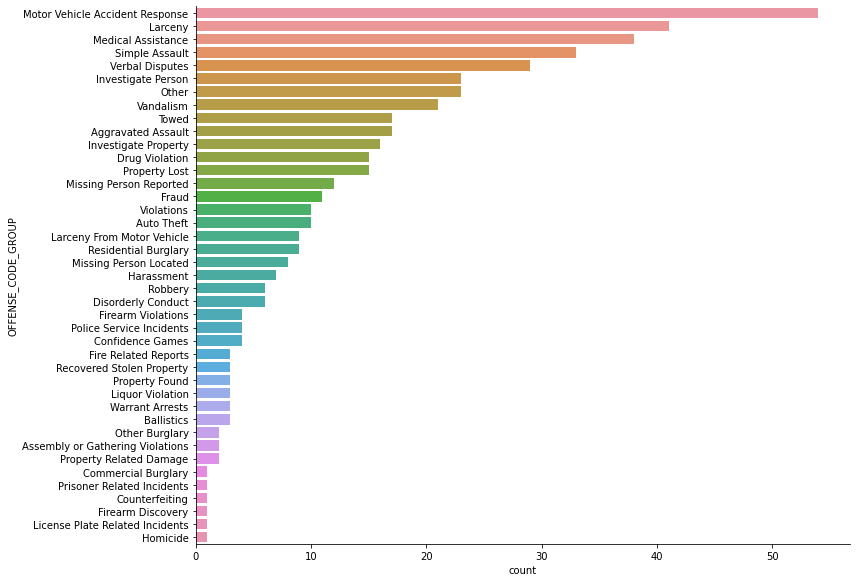

In [19]:
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=8, 
            aspect=1.5,
            order=df.OFFENSE_CODE_GROUP.value_counts().index,
           data=df)

### Motor Vehicle Accident Response

In [12]:
mv=df.loc[df.OFFENSE_CODE_GROUP=='Motor Vehicle Accident Response'][['Lat','Long']]
mv.Lat.fillna(0, inplace = True)
mv.Long.fillna(0, inplace = True) 

m4=folium.Map(location=boston,tiles='openstreetmap',zoom_start=11)
HeatMap(data=mv, radius=16).add_to(m4)

m4

If we study Medford Street, we find that it is close to Barry Playground. This means that some of the road accidents may have been caused due to parents who were possibly distracted by their children and could not focus on driving.There is a vine shop at the intersection of Moulton Street and Vine Street. It is possible that some of the accidents were DUI. 

### Larceny

In [13]:
lar=df.loc[df.OFFENSE_CODE_GROUP=='Larceny'][['Lat','Long']]
lar.Lat.fillna(0, inplace = True)
lar.Long.fillna(0, inplace = True) 

m5=folium.Map(location=boston,tiles='openstreetmap',zoom_start=11)
HeatMap(data=lar, radius=16).add_to(m5)

m5

If we study Faneuil Hall Square, we see that is is a commercial area with plenty of shops, markets, fast food restaurants etc. It is understandable why it is a hot spot for larceny.